In [6]:
import torch
import matplotlib.pyplot as plt

In [17]:
n_steps = 100
def make_beta_schedule(schedule='linear', n_timesteps=1000, start=1e-5, end=1e-2):
    if schedule == 'linear':
        betas = torch.linspace(start, end, n_timesteps)
    elif schedule == "quad":
        betas = torch.linspace(start ** 0.5, end ** 0.5, n_timesteps) ** 2
    elif schedule == "sigmoid":
        betas = torch.linspace(-6, 6, n_timesteps)
        betas = torch.sigmoid(betas) * (end - start) + start
    return betas
# Create schedule
betas = make_beta_schedule(schedule='sigmoid', n_timesteps=n_steps, start=1e-5, end=1e-2)

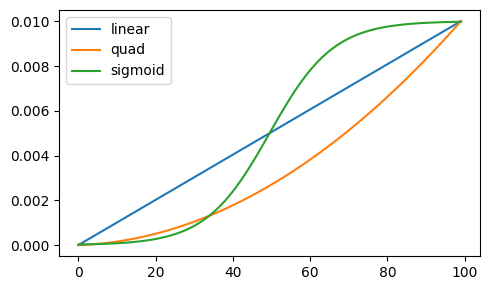

In [18]:
# plot different kind schedule
plt.figure(figsize=(5,3))
for kernel in ['linear', 'quad', 'sigmoid']:
      betas = make_beta_schedule(schedule=kernel, n_timesteps=n_steps, start=1e-5, end=1e-2)
      plt.plot(betas, label = kernel)
plt.legend()
plt.tight_layout()

In [19]:
# Fixed computation of variables for all timesteps
alphas = 1 - betas
alphas_prod = torch.cumprod(alphas, 0)
alphas_prod_p = torch.cat([torch.tensor([1]).float(), alphas_prod[:-1]], 0)
alphas_prod_p_sqrt = alphas_prod_p.sqrt()

In [20]:
alphas_prod, alphas_prod_p

(tensor([1.0000, 0.9999, 0.9999, 0.9998, 0.9998, 0.9997, 0.9997, 0.9996, 0.9995,
         0.9994, 0.9994, 0.9993, 0.9991, 0.9990, 0.9989, 0.9987, 0.9985, 0.9983,
         0.9981, 0.9979, 0.9976, 0.9973, 0.9969, 0.9965, 0.9961, 0.9956, 0.9950,
         0.9944, 0.9937, 0.9929, 0.9921, 0.9911, 0.9900, 0.9888, 0.9875, 0.9861,
         0.9844, 0.9827, 0.9807, 0.9786, 0.9762, 0.9736, 0.9708, 0.9678, 0.9645,
         0.9609, 0.9571, 0.9531, 0.9487, 0.9441, 0.9393, 0.9341, 0.9287, 0.9231,
         0.9173, 0.9112, 0.9050, 0.8985, 0.8919, 0.8851, 0.8782, 0.8711, 0.8640,
         0.8568, 0.8495, 0.8421, 0.8347, 0.8272, 0.8197, 0.8122, 0.8047, 0.7972,
         0.7898, 0.7823, 0.7749, 0.7674, 0.7601, 0.7527, 0.7454, 0.7382, 0.7310,
         0.7238, 0.7167, 0.7097, 0.7027, 0.6958, 0.6889, 0.6821, 0.6753, 0.6686,
         0.6620, 0.6554, 0.6489, 0.6424, 0.6360, 0.6297, 0.6234, 0.6172, 0.6110,
         0.6050]),
 tensor([1.0000, 1.0000, 0.9999, 0.9999, 0.9998, 0.9998, 0.9997, 0.9997, 0.9996,
         